In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 16})
mlib.rcParams.update({'errorbar.capsize': 2})

In [3]:
!pwd

/c/WinPython-64bit-2.7.9.4/notebooks


In [4]:
# files = !cd provenance & ls *.txt
files =  !ls *.txt
print files

['0_1_10.txt', '0_1_11.txt', '0_1_12.txt', '0_1_2.txt', '0_1_3.txt', '0_1_4.txt', '0_1_5.txt', '0_1_6.txt', '0_1_7.txt', '0_1_8.txt', '0_1_9.txt']


In [5]:
open_files = []
eof = []
for f in files:
    open_files.append(open(f, "r"))  
    eof.append(False)
print len(open_files), "files"

11 files


In [6]:
post_ids = []
pre_app_pops = []
pre_subpops = []
pre_ids = []

global_pre_id = []
global_post_id = []
distance_sq = []

elim_prob = []
removals = []
form_prob = []
formations = []

rem_fails = []
form_fails = []

files_based_removals = {}
files_based_formations = {}

sr_attempts = []
oob= []
dist_sq_control = []

errors = {}

In [7]:
for i in range(len(open_files)):
    files_based_removals[i] = []
    files_based_formations[i] = []
    for line in open_files[i]:
        if not line:
            eof[i] = True
        spleet = str.split(line)
        if "presynaptic subpopulation" in line:
            post_ids.append(int(spleet[4]))
            pre_app_pops.append(int(spleet[6]))
            pre_subpops.append(int(spleet[9]))
            pre_ids.append(int(spleet[-1]))
        elif "g_distance_sq" in line:
            global_pre_id.append([int(spleet[4]), int(spleet[10])])
            global_post_id.append(int(spleet[6]))
            distance_sq.append(int(spleet[8]))
            dist_sq_control.append([int(spleet[8]), int(spleet[-1])])
        elif "elim_prob" in line:
            elim_prob.append([int(spleet[5]), int(spleet[-1])])
        elif "form_prob" in line:
            form_prob.append([int(spleet[4]), int(spleet[7]), int(spleet[9])])
        elif "| RM pre" in line:
            removals.append([int(spleet[6]), int(spleet[8]), int(spleet[13]), int(spleet[-1])])
        elif "| FORM pre" in line:
            formations.append([int(spleet[6]), int(spleet[8]), int(spleet[15]), int(spleet[-1])])
        elif "| FAIL POT" in line or "| FAIL DEP" in line: 
            rem_fails.append(int(spleet[-1]))
            files_based_removals[i].append(int(spleet[-1]))
        elif "| NO FORM" in line:
            form_fails.append(int(spleet[-1]))
            files_based_formations[i].append(int(spleet[-1]))
        elif "sr_attempt" in line:
            sr_attempts.append([int(spleet[4]), int(spleet[5]), int(spleet[7])])  
        
        if "| OOB" in line:
            oob.append([int(spleet[5]), int(spleet[6]), int(spleet[7])])
            form_fails.append(int(spleet[6]))
            
        if "ERROR" in line:
            if len(sr_attempts)> 0:
                if line not in errors:
                        errors[line] = [sr_attempts[-1][0]]
                else:
                        errors[line].append(sr_attempts[-1][0])
            else:
                if line not in errors:
                        errors[line] = 1
                else:
                        errors[line] += 1

In [8]:
for f in open_files:
    f.close()

In [9]:
sr_attempts = np.asarray(sr_attempts)
sr_attempts.shape

(0L,)

In [10]:
post_ids = np.asarray(post_ids)
pre_app_pops = np.asarray(pre_app_pops)
pre_subpops = np.asarray(pre_subpops)
pre_ids = np.asarray(pre_ids)

global_pre_id = np.asarray(global_pre_id)
global_post_id = np.asarray(global_post_id)
distance_sq = np.asarray(distance_sq)

rem_fails = np.asarray(rem_fails)
form_fails = np.asarray(form_fails)
sr_attempts = np.asarray(sr_attempts)

oob=np.asarray(oob)
dist_sq_control=np.asarray(dist_sq_control)

elim_prob = np.asarray(elim_prob)

In [11]:
formations = np.asarray(formations)
removals = np.asarray(removals)
sr_attempts = np.asarray(sr_attempts)

In [12]:
data = np.asarray(pre_subpops)

In [13]:
data[data==0].size

0

In [14]:
global_pre_id

array([[103,   1],
       [ 72,   0],
       [ 71,   0],
       ..., 
       [ 79,   0],
       [196,   1],
       [ 49,   0]])

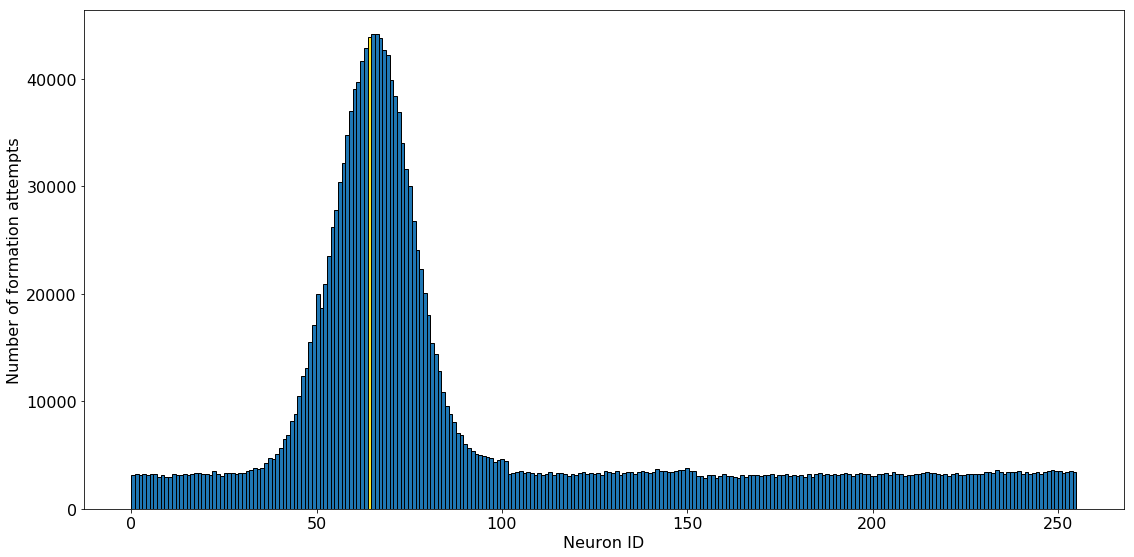

In [15]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=800)
d = np.unique(global_pre_id)
N, bins, patches = ax1.hist(global_pre_id[global_pre_id[:,1]==0][:,0], bins=d.size, edgecolor='black')
vir = plt.get_cmap('viridis', 3)

ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of formation attempts")

patches[64].set_facecolor(vir(3))

# Uncomment this if bimodal input distribution
# patches[3*256//4].set_facecolor(vir(3))

plt.tight_layout()
plt.savefig("potential_partner_pre_id_for_formation.png")

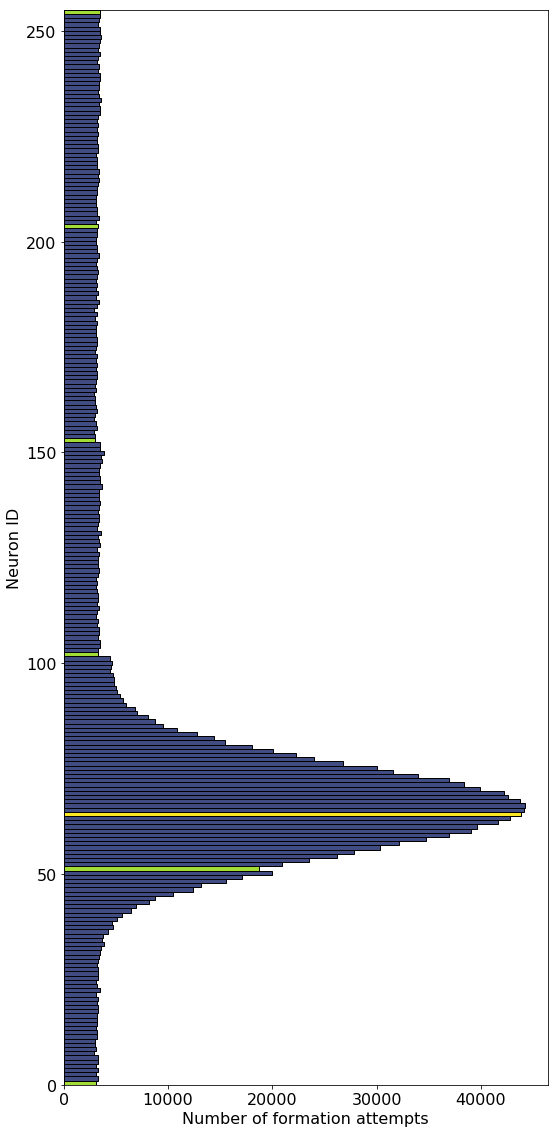

In [16]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8, 16), dpi=800)
d = np.unique(global_pre_id)

N, bins, patches = ax1.hist(global_pre_id[global_pre_id[:,1]==0][:,0], bins=d.size, orientation=u'horizontal', edgecolor='black')
vir = plt.get_cmap('viridis', 6)

ax1.set_ylabel("Neuron ID")
ax1.set_xlabel("Number of formation attempts")
for patch in patches:
    patch.set_facecolor('#414C82')
    
patches[64].set_facecolor(vir(6))

for i in range(6):
    patches[i * 51].set_facecolor('#A3DC37')

ax1.set_ylim([0,255])
# Uncomment this if bimodal input distribution
# patches[3*256//4].set_facecolor(vir(3))

plt.tight_layout()
plt.savefig("potential_partner_pre_id_for_formation_horizontal.png")

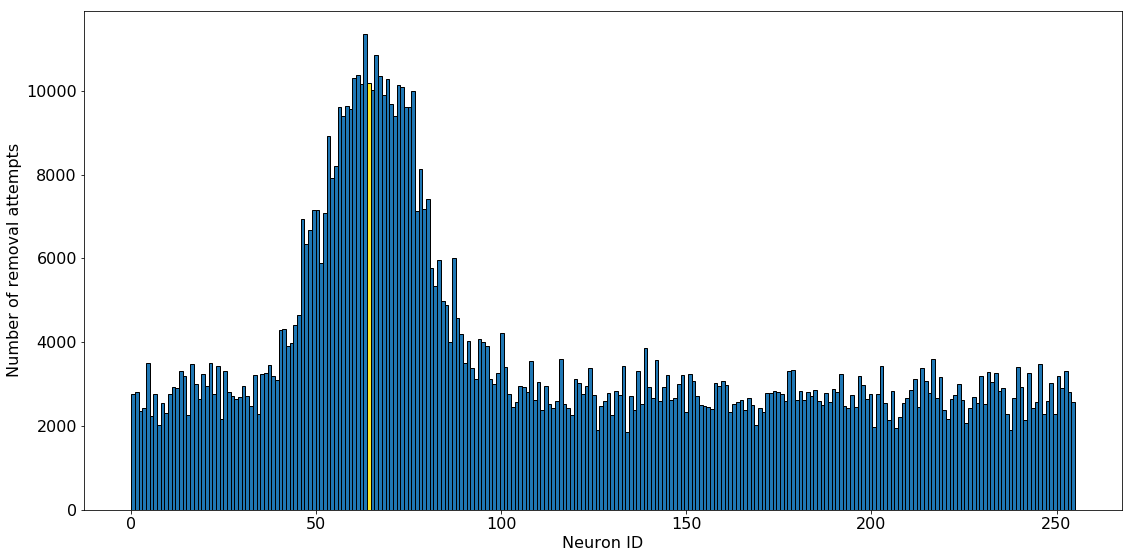

In [17]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_pre_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
N, bins, patches = ax1.hist(global_pre_id[global_pre_id[:,1]==1][:,0], bins=d.size, edgecolor='black')

ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of removal attempts")

vir = plt.get_cmap('viridis', 3)
patches[64].set_facecolor(vir(3))

# Uncomment this if bimodal input distribution
# patches[3*256//4].set_facecolor(vir(3))

plt.tight_layout()
plt.savefig("potential_partner_pre_id_for_removal.png")

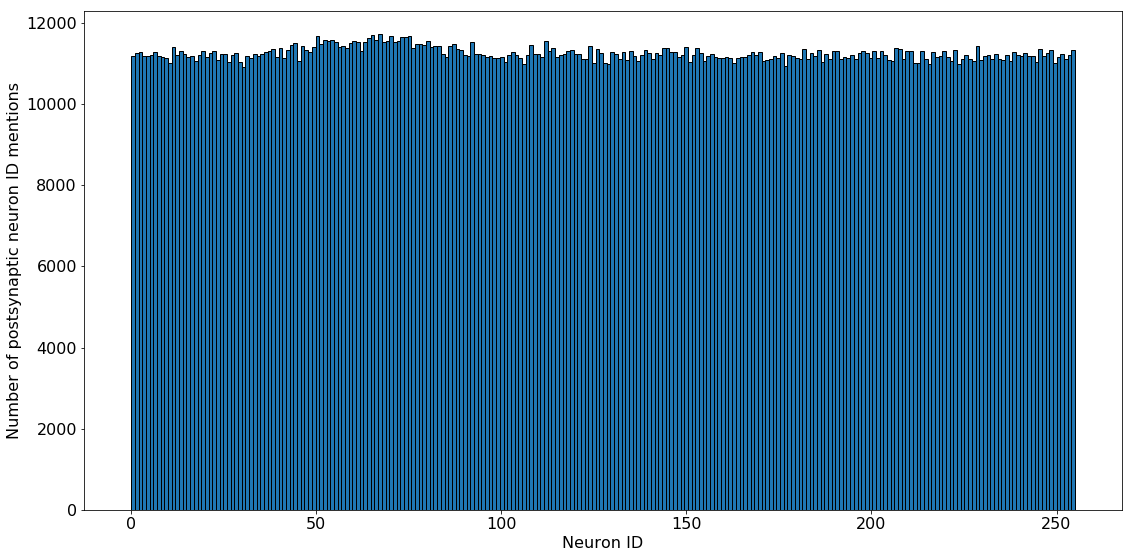

In [18]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_post_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of postsynaptic neuron ID mentions")

ax1.hist(global_post_id, bins=d.size, edgecolor='black')

plt.tight_layout()
plt.savefig("potential_partner_post_id.png")

In [19]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
#     delta = np.where(delta > grid * .5, delta - grid, delta)
#     print delta, grid
    if delta[0] > grid[0] * .5 and grid[0] > 0:
        delta[0] -= grid[0]
        
    if delta[1] > grid[1] * .5 and grid[1] > 0:
        delta[1] -= grid[1]

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))

def index_to_dist(i1, i2, grid):
    if grid[0] > 1:
        pre = (i1//grid[0], i1%grid[1])
        post = (i2//grid[0], i2%grid[1])
    else:
        pre = (0, i1%grid[1])
        post = (0, i2%grid[1])
    
    return distance(pre,post, grid=grid, type='euclidian')

In [20]:
layer_size = 256
grid_layout = np.asarray((1, 256))

In [21]:
for i in np.arange(global_post_id.size):
    assert np.round(index_to_dist(global_pre_id[i,0], global_post_id[i], grid_layout)**2) == distance_sq[i], \
    "{} vs {}".format(np.round(index_to_dist(global_pre_id[i, 0], global_post_id[i], grid_layout)**2),  distance_sq[i])

In [22]:
counts = np.ones((layer_size, layer_size)) * np.nan

In [23]:
wombo_combo = np.concatenate((global_post_id.reshape(1, global_post_id.shape[0]), global_pre_id[:,0].reshape(1, global_pre_id.shape[0]), global_pre_id[:,1].reshape(1, global_pre_id.shape[0])), axis=0).T

In [24]:
wombo_combo.shape

(2880345L, 3L)

In [25]:
for i in np.arange(global_post_id.size):
    if np.isnan(counts[global_pre_id[i,0], global_post_id[i]]):
        counts[global_pre_id[i,0], global_post_id[i]] = 1
    else:
        counts[global_pre_id[i,0], global_post_id[i]] += 1

(1915409L, 2L)


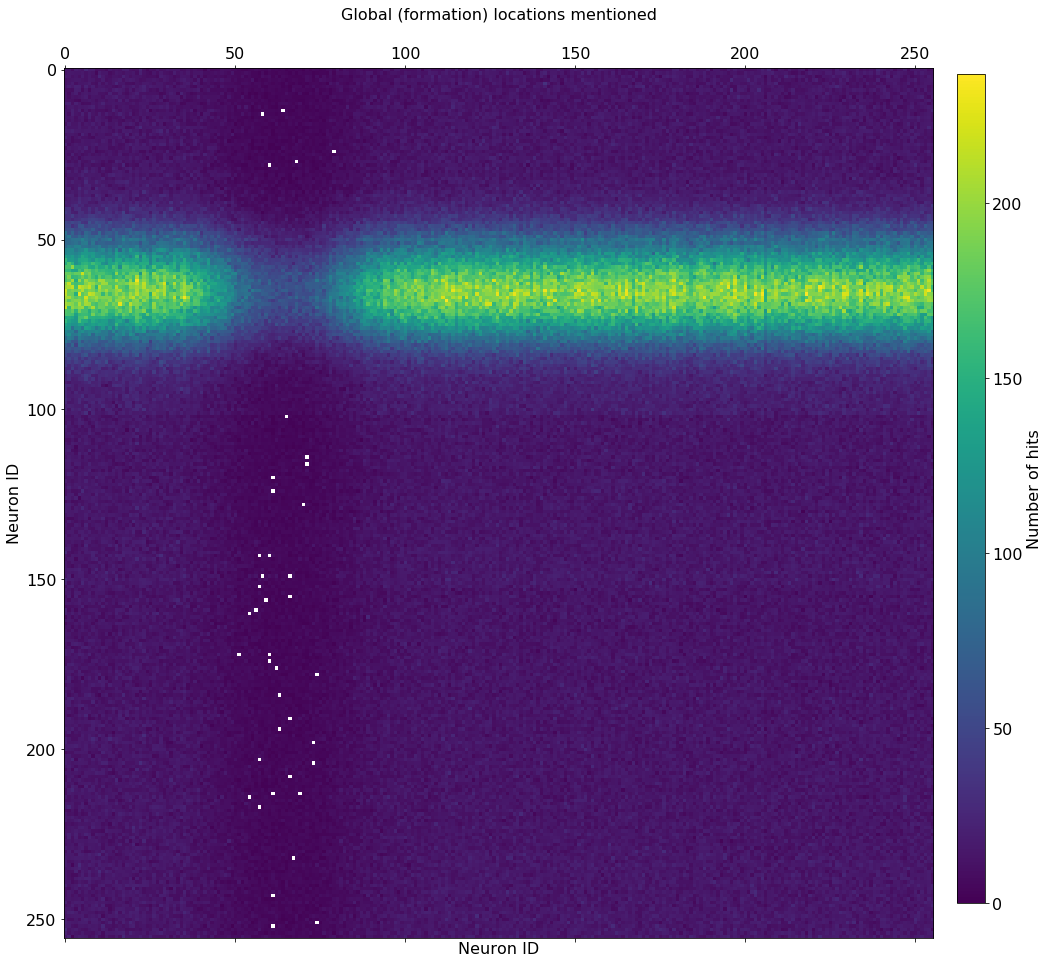

In [26]:
form_combos = wombo_combo[wombo_combo[:,2]==0][:,:2]
print form_combos.shape
form_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(form_combos.shape[0]):
    if np.isnan(form_counts[form_combos[i,1], form_combos[i,0]]):
        form_counts[form_combos[i,1], form_combos[i,0]] = 1
    else:
        form_counts[form_combos[i,1], form_combos[i,0]] += 1
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(form_counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Global (formation) locations mentioned", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)

plt.savefig("global_mentions_formations.png")

(964936L, 2L)


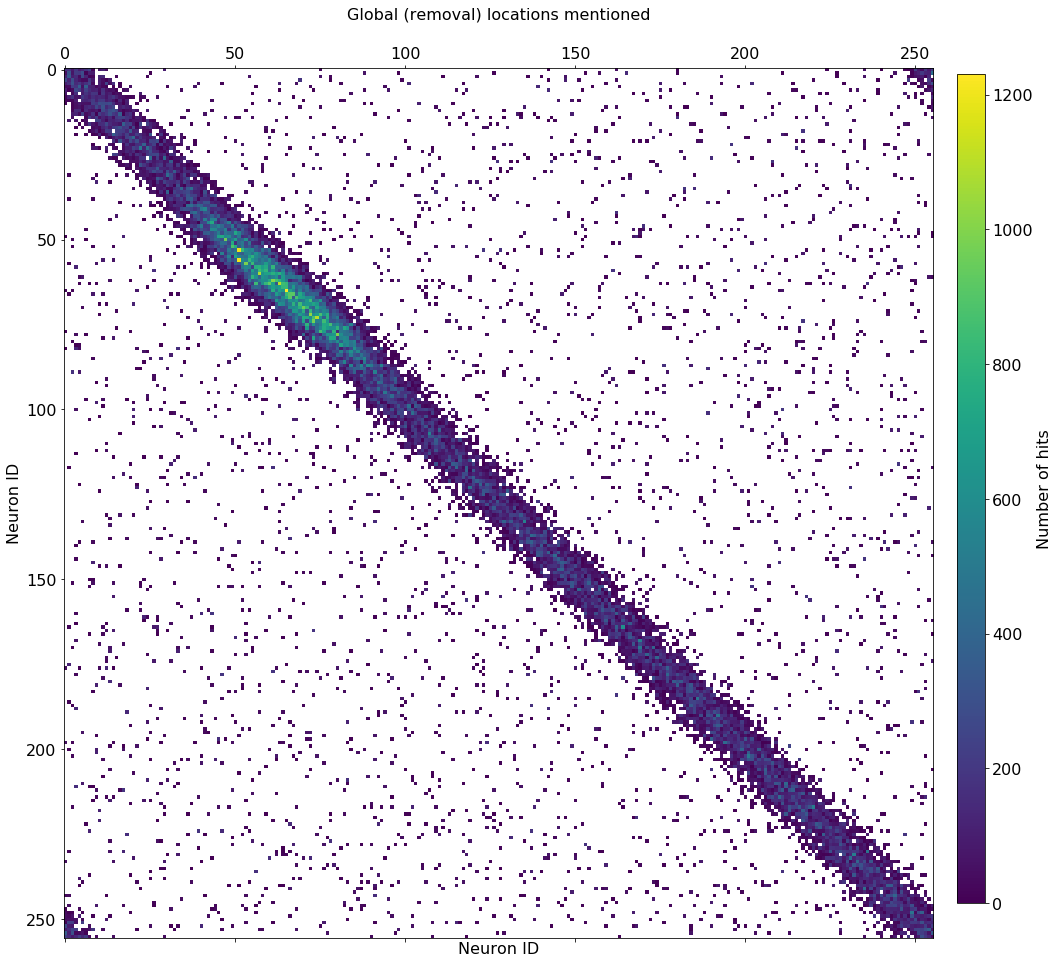

In [27]:
rem_combos = wombo_combo[wombo_combo[:,2]==1][:,:2]
print rem_combos.shape
rem_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(rem_combos.shape[0]):
    if np.isnan(rem_counts[rem_combos[i,1], rem_combos[i,0]]):
        rem_counts[rem_combos[i,1], rem_combos[i,0]] = 1
    else:
        rem_counts[rem_combos[i,1], rem_combos[i,0]] += 1
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(rem_counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Global (removal) locations mentioned", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)

plt.savefig("global_mentions_removals.png")

In [28]:
print "total rewire attempts", np.nansum(counts)

total rewire attempts 2880345.0


In [29]:
print "hit locations", np.count_nonzero(np.isfinite(counts))

hit locations 65498


In [30]:
print "surface coverage", np.count_nonzero(np.isfinite(counts)) * 100. / counts.size 

surface coverage 99.9420166016


In [31]:
elim_prob = np.asarray(elim_prob)
removals= np.asarray(removals)
form_prob= np.asarray(form_prob)
formations = np.asarray(formations)

In [32]:
formation_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(formations.shape[0]):
    if np.isnan(formation_counts[formations[i, 0], formations[i, 1]]):
        formation_counts[formations[i, 0], formations[i, 1]] = 1
    else:
        formation_counts[formations[i, 0], formations[i, 1]] += 1

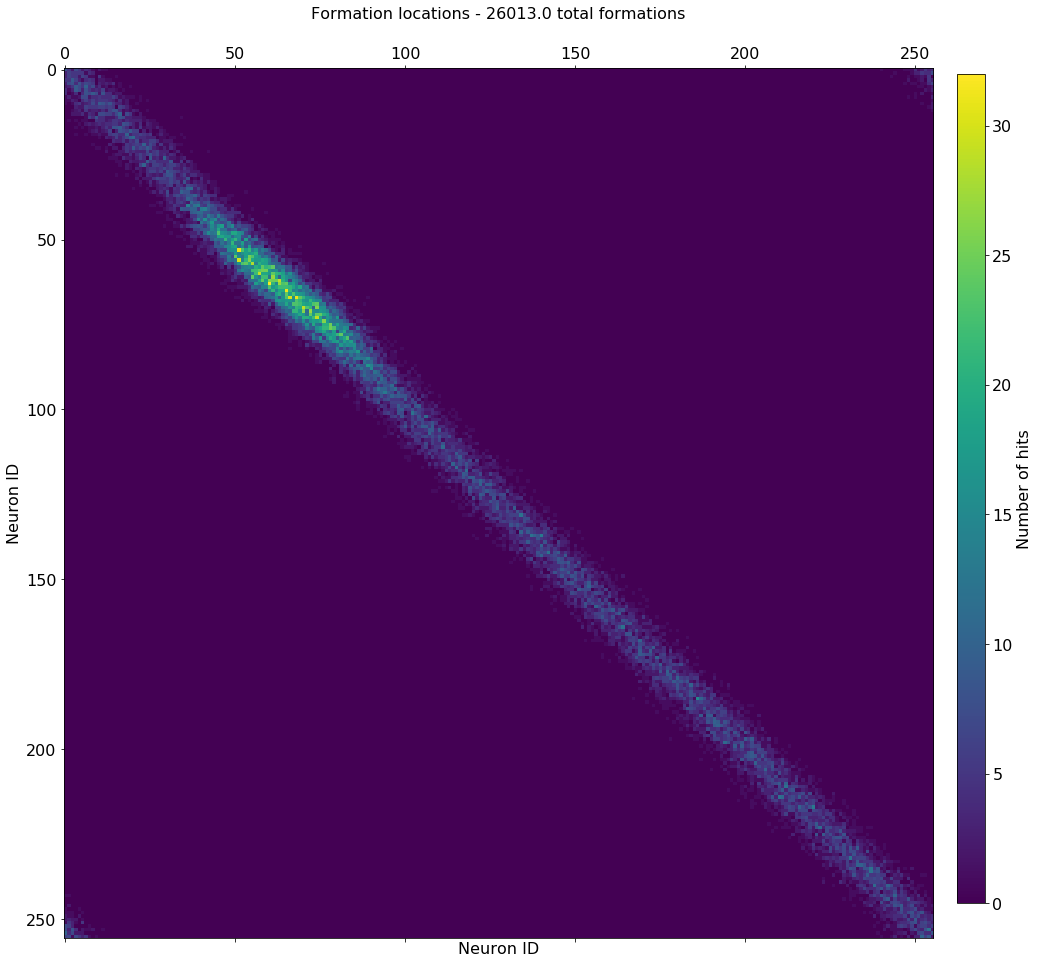

In [33]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(np.nan_to_num(formation_counts), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Formation locations - " 
              + str(np.sum(formation_counts[np.isfinite(formation_counts)])) 
              + " total formations" , fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)
plt.savefig("form_hits.png")

In [34]:
print "Total number of formations", np.sum(formation_counts[np.isfinite(formation_counts)])

Total number of formations 26013.0


In [35]:
np.sum(np.isfinite(formation_counts))

5533

In [36]:
deletion_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(removals.shape[0]):
    if np.isnan(deletion_counts[removals[i, 0], removals[i, 1]]):
        deletion_counts[removals[i, 0], removals[i, 1]] = 1
    else:
        deletion_counts[removals[i, 0], removals[i, 1]] += 1

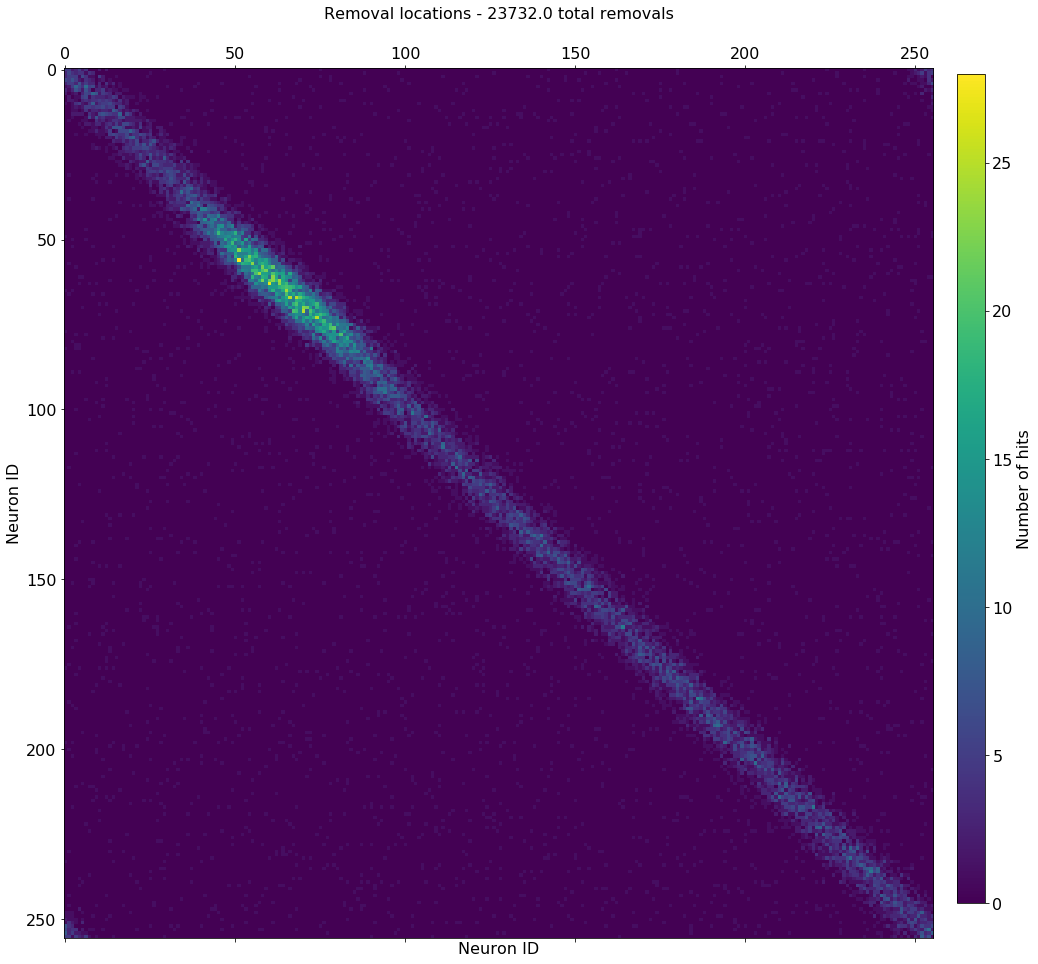

In [37]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(np.nan_to_num(deletion_counts), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Removal locations - " 
              + str(np.sum(deletion_counts[np.isfinite(deletion_counts)])) 
              + " total removals" , fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number of hits", fontsize=16)
plt.savefig("removal_hits.png")

In [38]:
print "Total number of removals", np.sum(deletion_counts[np.isfinite(deletion_counts)])

Total number of removals 23732.0


In [39]:
np.argmax(deletion_counts[np.isfinite(deletion_counts)])

1794

(array([ 398.,  387.,  368.,  366.,  327.,  324.,  326.,  313.,  287.,
         282.,  289.,  288.,  281.,  281.,  241.,  247.,  279.,  232.,
         279.,  259.,  262.,  257.,  246.,  250.,  260.,  286.,  255.,
         258.,  290.,  230.,  229.,  241.,  240.,  245.,  248.,  231.,
         247.,  254.,  248.,  293.,  239.,  261.,  238.,  220.,  238.,
         255.,  247.,  256.,  242.,  254.,  262.,  259.,  253.,  260.,
         226.,  257.,  234.,  268.,  244.,  212.,  232.,  255.,  247.,
         253.,  234.,  236.,  225.,  255.,  228.,  248.,  248.,  270.,
         244.,  261.,  268.,  256.,  266.,  241.,  266.,  256.,  232.,
         260.,  244.,  218.,  274.,  213.,  251.,  247.,  236.,  253.,
         265.,  276.,  238.,  249.,  248.,  241.,  240.,  280.,  261.,  249.]),
 array([  1.90000000e+01,   3.01880000e+03,   6.01860000e+03,
          9.01840000e+03,   1.20182000e+04,   1.50180000e+04,
          1.80178000e+04,   2.10176000e+04,   2.40174000e+04,
          2.70172000e+04

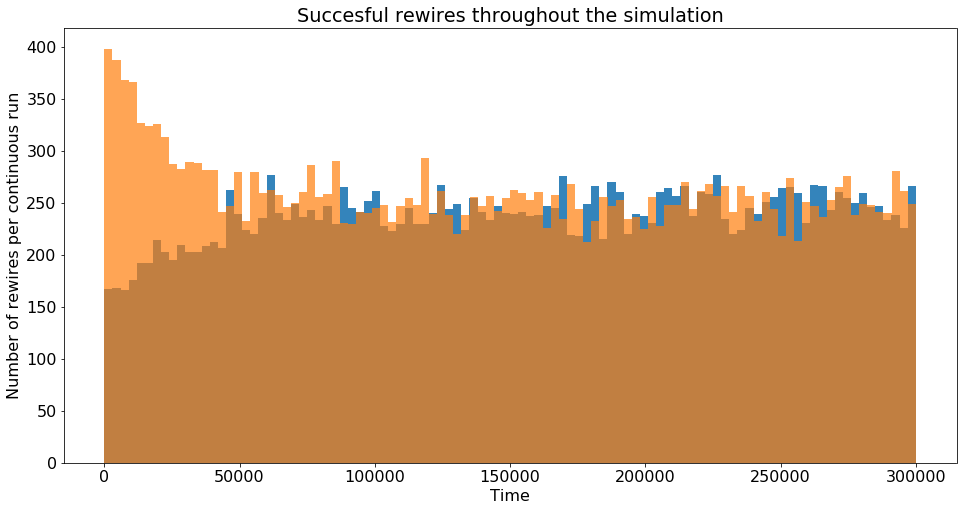

In [40]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Time")
ax1.hist(removals[:, -1], int(3000000/30000), alpha=.9)
ax1.hist(formations[:, -1], int(3000000/30000), alpha=.7)

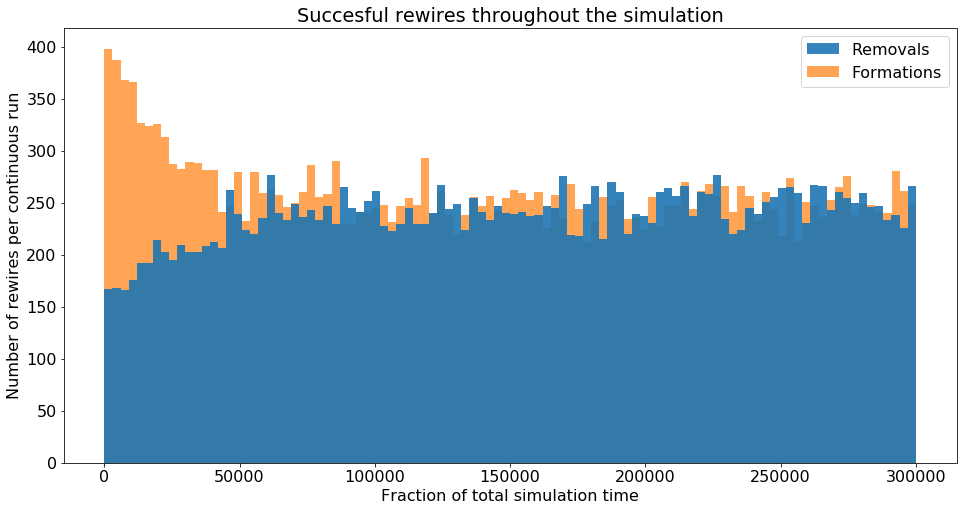

In [41]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Fraction of total simulation time")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[:, -1]  , int(300000/3000), alpha=.9, zorder=10, label="Removals")
ax1.hist(formations[:, -1], int(300000/3000), alpha=.7, zorder=9, label="Formations")
# ax1.hist(fail_times,        int(3000000/30000),color='r', zorder=10, alpha=.7, label="Failures")
# ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1, l1, loc='best')
plt.savefig('succesful_rewires.png')

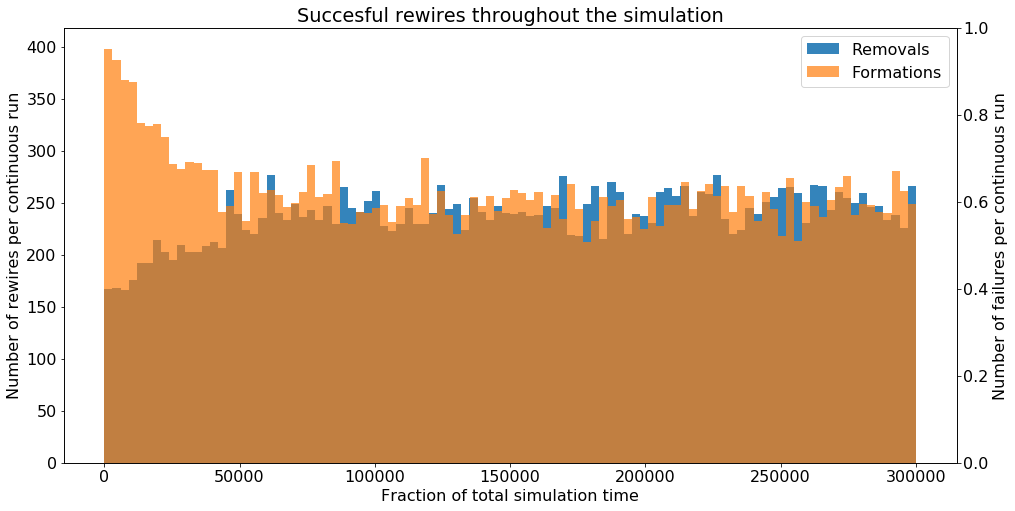

In [42]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Fraction of total simulation time")
ax1.set_zorder(2)
ax2 = ax1.twinx()
ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[removals[:,2]==0][:, -1]  , int(3000000/30000), alpha=.9, zorder=8, label="Removals")
ax1.hist(formations[formations[:,2]==0][:, -1], int(3000000/30000), alpha=.7, zorder=9, label="Formations")
# ax2.hist(fail_times, int(30000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='best')
plt.savefig('succesful_rewires_ff.png')